<a href="https://colab.research.google.com/github/code-freeze/keras_machineLearning/blob/master/housePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [0]:
zipfile.ZipFile('house-prices-advanced-regression-techniques.zip').extractall()

In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [0]:
# x=train['SalePrice']
# y=train['GarageCars']
# plt.figure(figsize=(40,10))
# sns.regplot(x=x,y=y,marker='+')
# plt.legend()

In [0]:
train_test_dataset=[train,test]

**mapping** algorithm

In [0]:
# centralAir_mapping={"Y":1,"N":0}
# for dataset in train_test_dataset:
#   dataset['CentralAir']=dataset['CentralAir'].map(centralAir_mapping)

In [0]:
# street_mapping={"Pave":1,"Grvl":0}
# for dataset in train_test_dataset:
#   dataset['Street']=dataset['Street'].map(street_mapping)

In [0]:
# landContour_mapping={'Lvl':1, 'Bnk':2, 'Low':3, 'HLS':4}
# for dataset in train_test_dataset:
#   dataset['LandContour']=dataset['LandContour'].map(landContour_mapping)

In [0]:
# lotShape_mapping={'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}
# for dataset in train_test_dataset:
#   dataset['LotShape']=dataset['LotShape'].map(lotShape_mapping)

In [0]:
# LotConfig_mapping={'Inside' :1, 'FR2' :2, 'Corner' :3, 'CulDSac': 4, 'FR3':5}
# for dataset in train_test_dataset:
#   dataset['LotConfig']=dataset['LotConfig'].map(LotConfig_mapping)

In [0]:
# MSZoning_mapping={'RL':1, 'RM':2, 'C (all)' :3, 'FV':4, 'RH':5}
# for dataset in train_test_dataset:
#   dataset['MSZoning']=dataset['MSZoning'].map(MSZoning_mapping)

In [41]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

1.8828757597682129

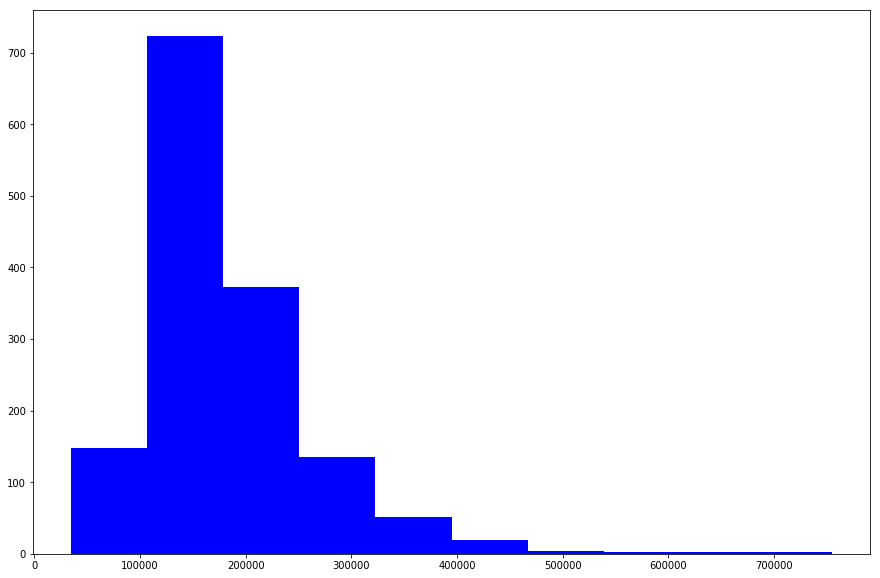

In [42]:
plt.figure(figsize=(15,10))
plt.hist(train.SalePrice,color='blue')
train.SalePrice.skew()

0.12133506220520406

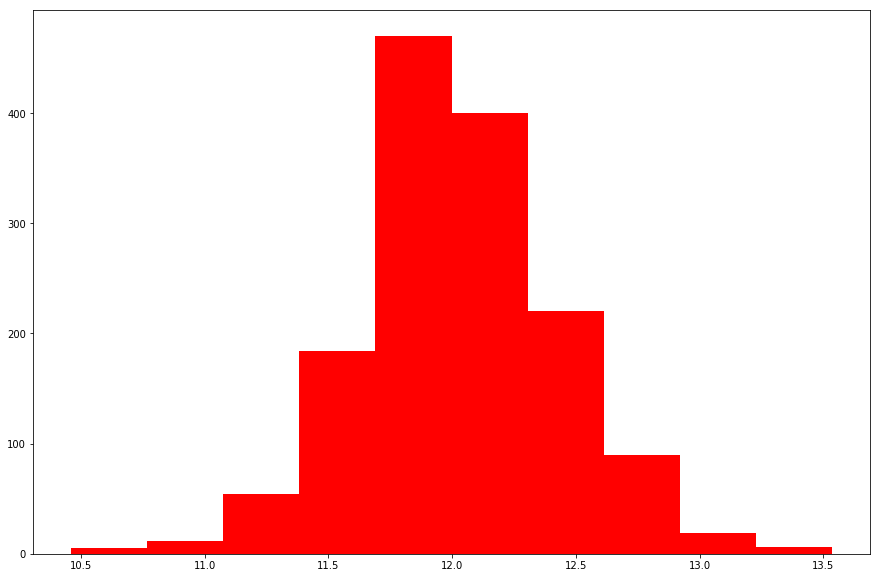

In [43]:
transform_data=np.log(train.SalePrice)
plt.figure(figsize=(15,10))
plt.hist(transform_data,color='red')
np.log(train.SalePrice).skew()

In [47]:
num_features=train.select_dtypes(include=(np.number))
num_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [49]:
corr=num_features.corr()
num_features.corr(method='kendall')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.014198,-0.022489,-0.003550,-0.020898,0.002698,-0.004035,-0.008415,-0.026222,-0.009105,-0.005545,-0.006501,-0.022232,-0.000301,0.006823,-0.023080,0.002175,0.003751,-0.017531,0.005745,0.002064,0.032048,0.006189,0.018760,-0.010813,-0.000457,0.009987,0.004082,-0.031211,-0.002009,-0.005360,-0.029802,0.004762,0.045303,-0.035251,0.013966,0.001326,-0.012030
MSSubClass,0.014198,1.000000,-0.236067,-0.200790,0.083506,-0.057833,0.010922,-0.003649,0.018061,-0.079554,-0.071900,-0.086258,-0.234613,-0.201798,0.405345,0.066860,0.141142,-0.037486,0.002230,0.169025,0.250498,0.064922,0.244957,0.133565,0.016988,0.052619,0.019290,-0.035341,0.018110,0.025413,0.010590,-0.031583,-0.018751,0.029447,-0.028830,0.014059,-0.021802,-0.003979
LotFrontage,-0.022489,-0.236067,1.000000,0.510666,0.193309,-0.065029,0.138978,0.083595,0.197848,0.112092,0.042690,0.082474,0.274099,0.306016,0.042451,-0.024931,0.261243,0.070795,-0.003209,0.180774,0.079747,0.259606,0.001819,0.277150,0.198863,0.081254,0.278278,0.263120,0.080382,0.129485,-0.075647,0.052914,0.035484,0.069963,0.019833,0.018147,0.002403,0.290361
LotArea,-0.003550,-0.200790,0.510666,1.000000,0.173136,-0.036164,0.074436,0.053329,0.132267,0.120827,0.057501,0.052923,0.252669,0.311072,0.086576,-0.016481,0.304676,0.077897,0.037564,0.190968,0.116139,0.267224,-0.018601,0.303366,0.279682,0.030517,0.264666,0.247904,0.133455,0.126485,-0.051719,0.050724,0.074070,0.068907,0.048161,0.004481,-0.020255,0.314174
OverallQual,-0.020898,0.083506,0.193309,0.173136,1.000000,-0.152513,0.505804,0.437687,0.341051,0.104062,-0.101893,0.205094,0.349043,0.307490,0.244571,-0.030355,0.464189,0.087385,-0.045162,0.513944,0.265575,0.104216,-0.171960,0.351349,0.365010,0.474646,0.543120,0.424225,0.209439,0.346309,-0.139530,0.029395,0.040856,0.050609,-0.078040,0.047233,-0.020327,0.669660
OverallCond,0.002698,-0.057833,-0.065029,-0.036164,-0.152513,1.000000,-0.329379,-0.031641,-0.149822,-0.012308,0.092477,-0.096586,-0.168321,-0.128240,0.000915,0.036670,-0.118681,-0.048669,0.107635,-0.241425,-0.065978,-0.003477,-0.092452,-0.087672,-0.040712,-0.295814,-0.226809,-0.156301,-0.035247,-0.107522,0.097942,0.029930,0.068009,-0.005175,0.079860,-0.005585,0.042257,-0.103492
YearBuilt,-0.004035,0.010922,0.138978,0.074436,0.505804,-0.329379,1.000000,0.624893,0.300645,0.151742,-0.090010,0.087547,0.296103,0.203002,0.013822,-0.119523,0.191389,0.132515,-0.054524,0.437111,0.199885,-0.026412,-0.128044,0.130910,0.137551,0.838521,0.491814,0.381106,0.204089,0.284283,-0.324028,0.018436,-0.058717,0.007335,-0.075164,0.012968,-0.009402,0.470960
YearRemodAdd,-0.008415,-0.003649,0.083595,0.053329,0.437687,-0.031641,0.624893,1.000000,0.176332,0.051501,-0.101920,0.120251,0.208188,0.166878,0.053741,-0.053443,0.189392,0.082374,-0.026191,0.353315,0.124720,-0.042953,-0.128114,0.146455,0.095041,0.644826,0.371014,0.282788,0.165740,0.255900,-0.187786,0.042759,-0.037362,0.002328,-0.074961,0.015121,0.034830,0.412955
MasVnrArea,-0.026222,0.018061,0.197848,0.132267,0.341051,-0.149822,0.300645,0.176332,1.000000,0.187837,-0.053776,0.056767,0.272309,0.265345,0.048327,-0.096169,0.244998,0.108805,0.029618,0.259883,0.151512,0.098055,-0.044559,0.216962,0.224180,0.227015,0.346929,0.276531,0.144636,0.167763,-0.156450,0.036891,0.033783,0.004388,-0.044981,0.013728,0.000542,0.321250
BsmtFinSF1,-0.009105,-0.079554,0.112092,0.120827,0.104062,-0.012308,0.151742,0.051501,0.187837,1.000000,0.036774,-0.412606,0.311853,0.239716,-0.144424,-0.066692,0.039623,0.573172,0.076902,0.010347,-0.011699,-0.067277,-0.090166,-0.037727,0.156498,0.066580,0.152819,0.179541,0.133494,0.059288,-0.121551,0.039480